In [ ]:
# # Importing all necessary libraries
# import cv2
# import os
  
# # Read the video from specified path
# cam = cv2.VideoCapture("C:\\Users\\Admin\\PycharmProjects\\project_1\\openCV.mp4")
  
# try:
      
#     # creating a folder named data
#     if not os.path.exists('data'):
#         os.makedirs('data')
  
# # if not created then raise error
# except OSError:
#     print ('Error: Creating directory of data')
  
# # frame
# currentframe = 0
  
# while(True):
      
#     # reading from frame
#     ret,frame = cam.read()
  
#     if ret:
#         # if video is still left continue creating images
#         name = './data/frame' + str(currentframe) + '.jpg'
#         print ('Creating...' + name)
  
        # writing the extracted images
        # cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
    #     currentframe += 1
    # else:
    #     break
  
# Release all space and windows once done
# cam.release()
# cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_directory = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/RiceProject/Train",
)
valid_directory = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/RiceProject/Test",
)



Found 283 files belonging to 3 classes.
Found 94 files belonging to 3 classes.


In [ ]:
num_helath_tr = len(os.listdir( "/content/drive/MyDrive/RiceProject/Train"))
num_other_tr = len(os.listdir( "/content/drive/MyDrive/RiceProject/Train"))
num_trip_tr = len(os.listdir( "/content/drive/MyDrive/RiceProject/Train"))

num_helath_val = len(os.listdir( "/content/drive/MyDrive/RiceProject/Test"))
num_other_val = len(os.listdir( "/content/drive/MyDrive/RiceProject/Test"))
num_trip_val = len(os.listdir( "/content/drive/MyDrive/RiceProject/Test"))

total_train = num_helath_tr + num_other_tr + num_trip_tr
total_val = num_helath_val + num_other_val + num_trip_val

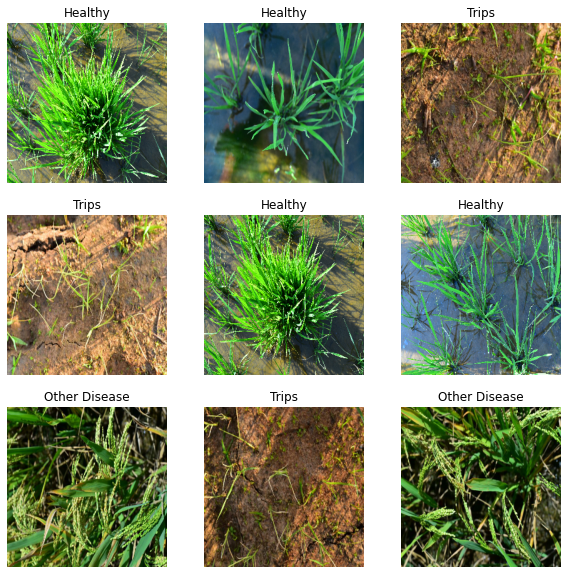

In [ ]:
class_names = ["Healthy", "Other Disease", "Trips"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

**Flipping the image horizontally**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="/content/drive/MyDrive/RiceProject/Train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 283 images belonging to 3 classes.


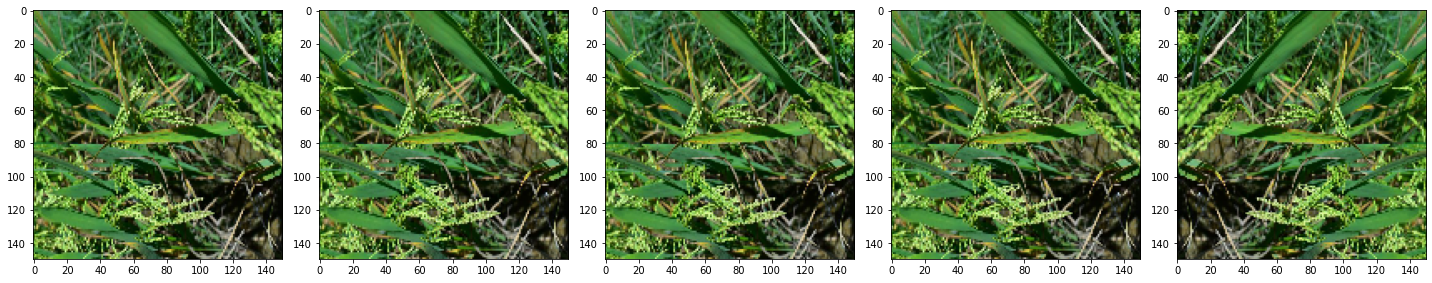

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Rotating the image**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="/content/drive/MyDrive/RiceProject/Train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 283 images belonging to 3 classes.


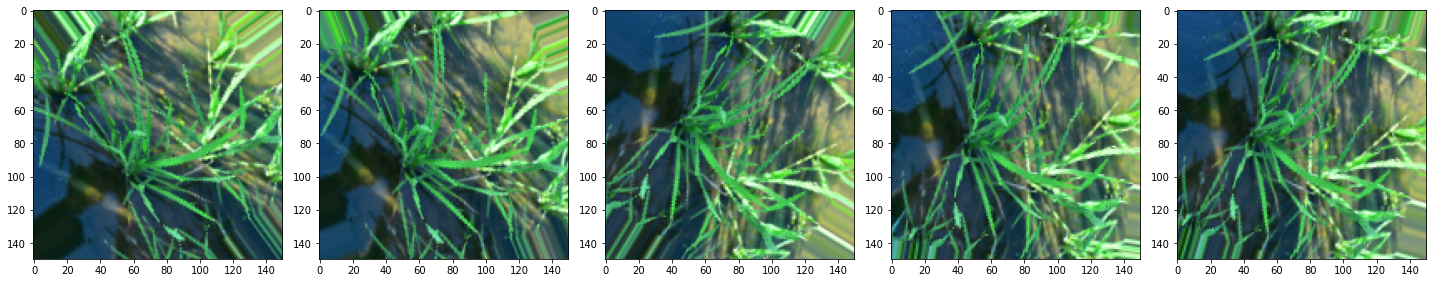

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Applying Zoom**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory= "/content/drive/MyDrive/RiceProject/Train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 283 images belonging to 3 classes.


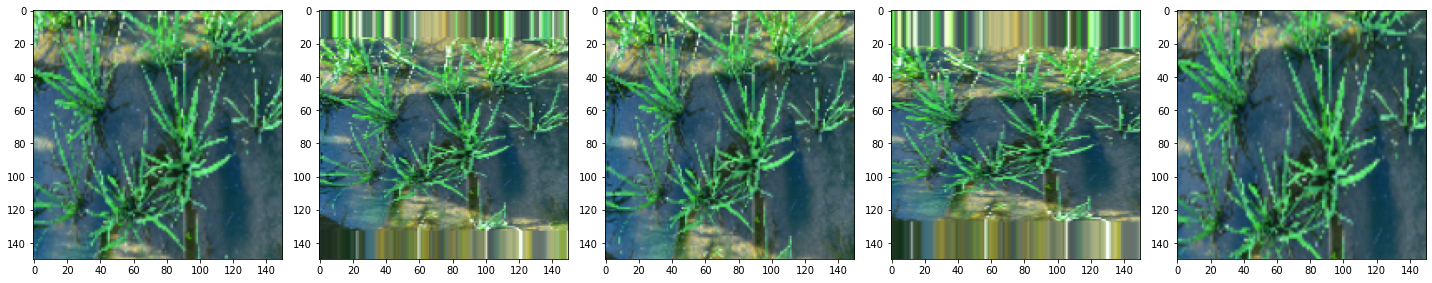

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Putting it all together**

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= "/content/drive/MyDrive/RiceProject/Train",
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 283 images belonging to 3 classes.


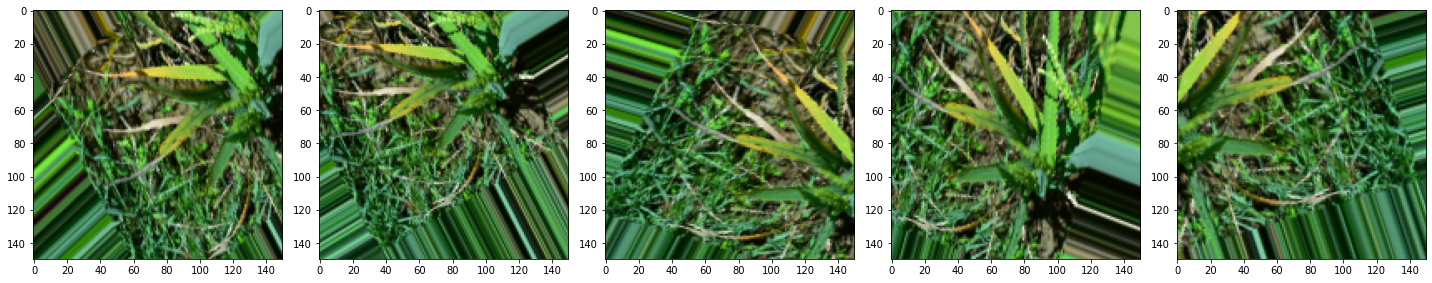

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Creating Validation Data generator**

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory="/content/drive/MyDrive/RiceProject/Test",
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 94 images belonging to 3 classes.


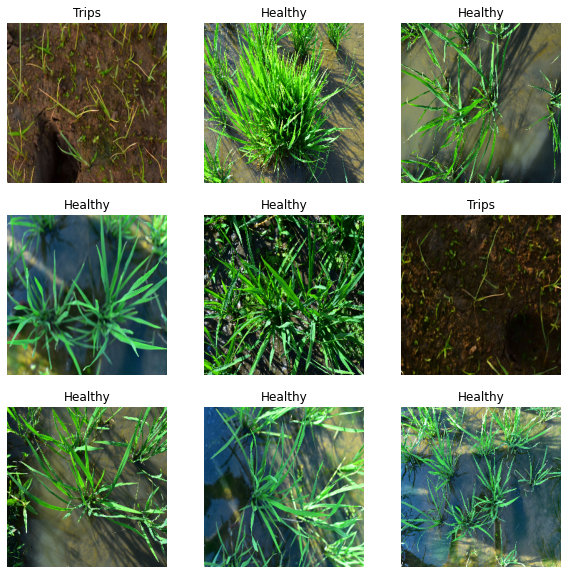

In [ ]:
class_names = ["Healthy", "Other Disease", "Trips"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# **Model Creation**

**Define the model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [ ]:
IMAGE_SIZE =[150, 150]

**Set Vgg16 model**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from glob import glob

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

NameError: ignored

**vgg16Model Summary**

In [ ]:
from keras.models import Model

# create a model object
vggModel = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
vggModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**Compiling the model**

In [ ]:
vggModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Train the model using vgg16**

In [ ]:
# epochs=20
# history = vggModel.fit_generator(
#     train_data_gen,
#     steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
# )
# epoches = 20
# vggHistory = vggModel.fit(
#     train_data_gen,
#     validation_data = val_data_gen,
#     epochs =epochs
# )

vggHistory = vggModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

<ipython-input-52-1ded78705de9>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vggHistory = vggModel.fit_generator(


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 365s 139s/step - loss: 1.2241 - accuracy: 0.4912 - val_loss: 1.7791 - val_accuracy: 0.2128
Epoch 2/20
3/3 [==============================] - 310s 105s/step - loss: 1.0317 - accuracy: 0.6820 - val_loss: 1.2355 - val_accuracy: 0.6170
Epoch 3/20
3/3 [==============================] - 323s 116s/step - loss: 0.7460 - accuracy: 0.7774 - val_loss: 0.7503 - val_accuracy: 0.6277
Epoch 4/20
3/3 [==============================] - 328s 119s/step - loss: 0.5262 - accuracy: 0.8304 - val_loss: 0.5881 - val_accuracy: 0.8298
Epoch 5/20
3/3 [==============================] - 318s 111s/step - loss: 0.5005 - accuracy: 0.8269 - val_loss: 0.5449 - val_accuracy: 0.7021
Epoch 6/20
3/3 [==============================] - 323s 108s/step - loss: 0.3790 - accuracy: 0.8622 - val_loss: 0.5547 - val_accuracy: 0.6702
Epoch 7/20
3/3 [==============================] - 321s 101s/step - loss: 0.3463 - accuracy: 0.8693 - val_loss: 0.5168 - val_accuracy: 0.6915
Epoch 8/20
3/3 [========

**Visualizing results of the training Vgg16**

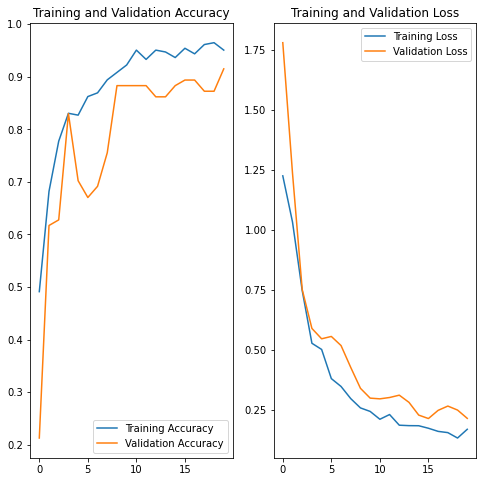

In [ ]:
acc = vggHistory.history['accuracy']
val_acc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
val_loss = vggHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Visualizing barplots and confusion metrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
labels = ['Heathy', 'Other Disease', 'Trips']


# Check point
# Showing labels
print(labels)

['Heathy', 'Other Disease', 'Trips']


<ipython-input-56-094abb6c180a>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = vggModel.predict_generator(val_data_gen)


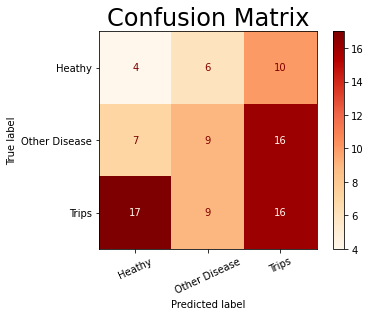

In [ ]:
%matplotlib inline

Y_pred = vggModel.predict_generator(val_data_gen)
y_pred = np.argmax(Y_pred, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m = confusion_matrix(val_data_gen.classes, y_pred)

display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
vggModel.save('vggModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model1 = load_model('./vggModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

Found 283 images belonging to 3 classes.


In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model1.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 [==============================] - 0s 280ms/step


'Healthy'

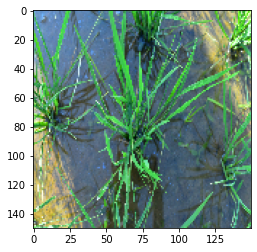

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Healthy/Copy of 13.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Healthy/Copy of 13.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# **Setting InceptionV3**

In [ ]:
from keras.applications.inception_v3 import InceptionV3

# add preprocessing layer to the front of Inception
inception = InceptionV3(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 2s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
inceptionPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
from keras.models import Model

# create a model object
inceptionModel = Model(inputs=inception.input, outputs=inceptionPrediction)

# view the structure of the model
inceptionModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                              

In [ ]:
inceptionModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
inceptionHistory = inceptionModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

<ipython-input-40-10dc9fb0e396>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inceptionHistory = inceptionModel.fit_generator(


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 274s 103s/step - loss: 2.9782 - accuracy: 0.5053 - val_loss: 1.4289 - val_accuracy: 0.2553
Epoch 2/20
3/3 [==============================] - 222s 71s/step - loss: 1.3476 - accuracy: 0.6042 - val_loss: 0.5008 - val_accuracy: 0.9468
Epoch 3/20
3/3 [==============================] - 216s 79s/step - loss: 0.6505 - accuracy: 0.7809 - val_loss: 0.9200 - val_accuracy: 0.4894
Epoch 4/20
3/3 [==============================] - 218s 82s/step - loss: 0.6278 - accuracy: 0.8021 - val_loss: 0.4960 - val_accuracy: 0.7340
Epoch 5/20
3/3 [==============================] - 212s 82s/step - loss: 0.2831 - accuracy: 0.9293 - val_loss: 0.2800 - val_accuracy: 0.9255
Epoch 6/20
3/3 [==============================] - 212s 76s/step - loss: 0.4496 - accuracy: 0.8763 - val_loss: 0.3627 - val_accuracy: 0.8191
Epoch 7/20
3/3 [==============================] - 220s 81s/step - loss: 0.2691 - accuracy: 0.9187 - val_loss: 0.4388 - val_accuracy: 0.7872
Epoch 8/20
3/3 [==============

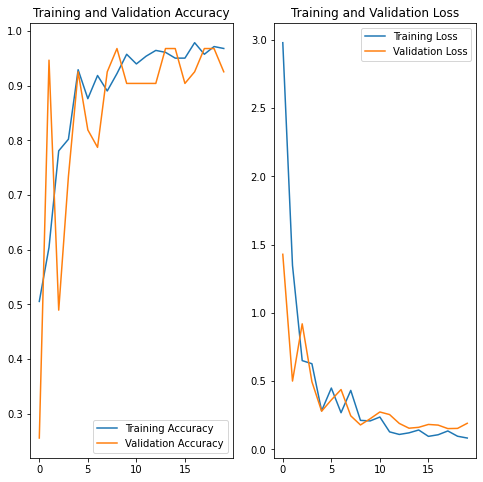

In [ ]:
acc = inceptionHistory.history['accuracy']
val_acc = inceptionHistory.history['val_accuracy']

loss = inceptionHistory.history['loss']
val_loss = inceptionHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
labels = ['Heathy', 'Other Disease', 'Trips']


# Check point
# Showing labels
print(labels)

['Heathy', 'Other Disease', 'Trips']


**confusion_matrix**

<ipython-input-45-63b61f20d980>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_predI = inceptionModel.predict_generator(val_data_gen)


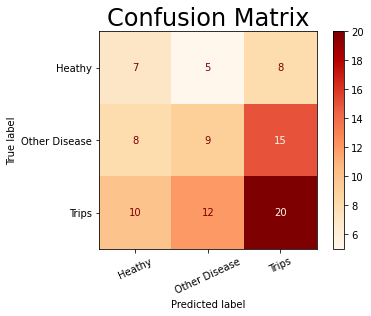

In [ ]:
%matplotlib inline

Y_predI = inceptionModel.predict_generator(val_data_gen)
y_predI = np.argmax(Y_predI, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_I = confusion_matrix(val_data_gen.classes, y_predI)

display_c_m_I = ConfusionMatrixDisplay(c_m_I, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_I.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
inceptionModel.save('inceptionModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model2 = load_model('./inceptionModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_inception = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_inception.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

Found 283 images belonging to 3 classes.


In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model2.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 [==============================] - 0s 74ms/step


'Trips'

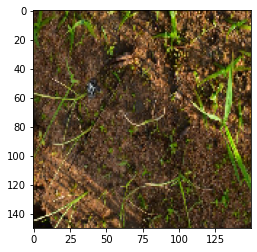

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Trips/16.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Trips/16.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# **Train Model using MobileNetV2**

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

# add preprocessing layer to the front of MobileNet
MobileNet = MobileNetV2(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in MobileNet.layers:
  layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from glob import glob

folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(MobileNet.output)
# x = Dense(1000, activation='relu')(x)
mobileNetPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
mobileNetModel = Model(inputs=MobileNet.input, outputs=mobileNetPrediction)

# view the structure of the model
mobileNetModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']         

In [ ]:
mobileNetModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
mobileNetHistory = mobileNetModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = mobileNetHistory.history['accuracy']
val_acc = mobileNetHistory.history['val_accuracy']

loss = mobileNetHistory.history['loss']
val_loss = mobileNetHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**confusion_metrix**

In [ ]:
%matplotlib inline

Y_predM = mobileNetModel.predict_generator(val_data_gen)
y_predM = np.argmax(Y_predM, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_M = confusion_matrix(val_data_gen.classes, y_predM)

display_c_m_M = ConfusionMatrixDisplay(c_m_M, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_M.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
mobileNetModel.save('mobileNetModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model3 = load_model('./mobileNetModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_mobileNet = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_mobileNet.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model3.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# Training model using **InceptionResNetV2**

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

# add preprocessing layer to the front of InceptionResNetV2
InceptionResNet = InceptionResNetV2(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in InceptionResNet.layers:
  layer.trainable = False

219055592/219055592 [==============================] - 9s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(InceptionResNet.output)
# x = Dense(1000, activation='relu')(x)
InceptionResNetPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
inceptionResNetModel = Model(inputs=InceptionResNet.input, outputs=InceptionResNetPrediction)

# view the structure of the model
inceptionResNetModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [ ]:
inceptionResNetModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
inceptionResNetHistory = inceptionResNetModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = inceptionResNetHistory.history['accuracy']
val_acc = inceptionResNetHistory.history['val_accuracy']

loss = inceptionResNetHistory.history['loss']
val_loss = inceptionResNetHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**confusion metrix**

In [ ]:
%matplotlib inline

Y_predIR = inceptionResNetModel.predict_generator(val_data_gen)
y_predIR = np.argmax(Y_predIR, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_IR = confusion_matrix(val_data_gen.classes, y_predIR)

display_c_m_IR = ConfusionMatrixDisplay(c_m_IR, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_IR.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
inceptionResNetModel.save('inceptionResNetModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model4 = load_model('./inceptionResNetModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_inceptionresnet = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_inceptionresnet.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model4.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# training model using **xception**

In [ ]:
from keras.applications.xception import Xception

# add preprocessing layer to the front of xception
xceptionLayr = Xception(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in xceptionLayr.layers:
  layer.trainable = False

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(xceptionLayr.output)
# x = Dense(1000, activation='relu')(x)
xceptionLayrPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
xceptionModel = Model(inputs=xceptionLayr.input, outputs=xceptionLayrPrediction)

# view the structure of the model
xceptionModel.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

In [ ]:
xceptionModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
xceptionHistory = xceptionModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = xceptionHistory.history['accuracy']
val_acc = xceptionHistory.history['val_accuracy']

loss = xceptionHistory.history['loss']
val_loss = xceptionHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**confusion metrix**

In [ ]:
%matplotlib inline

Y_predX = xceptionModel.predict_generator(val_data_gen)
y_predX = np.argmax(Y_predX, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_X = confusion_matrix(val_data_gen.classes, y_predX)

display_c_m_X = ConfusionMatrixDisplay(c_m_X, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_X.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
xceptionModel.save('xceptionModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model5 = load_model('./xceptionModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_xception = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_xception.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model5.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# **traning model using densenet121**

In [ ]:
from keras.applications.densenet import DenseNet121

# add preprocessing layer to the front of xception
densenet = DenseNet121(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in densenet.layers:
  layer.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
densenetPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
densenetModel = Model(inputs=densenet.input, outputs=densenetPrediction)

# view the structure of the model
densenetModel.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1/conv[0][0]']       

In [ ]:
densenetModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
densenetHistory = densenetModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = densenetHistory.history['accuracy']
val_acc = densenetHistory.history['val_accuracy']

loss = densenetHistory.history['loss']
val_loss = densenetHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**confusion metrix**

In [ ]:
%matplotlib inline

Y_predD = densenetModel.predict_generator(val_data_gen)
y_predD = np.argmax(Y_predD, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_D = confusion_matrix(val_data_gen.classes, y_predD)

display_c_m_D = ConfusionMatrixDisplay(c_m_D, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_D.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
densenetModel.save('densenetModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model6 = load_model('./densenetModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_densenet = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_densenet.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model6.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

# training model using **resnet50**

In [ ]:
from keras.applications.resnet import ResNet50

# add preprocessing layer to the front of xception
resnet = ResNet50(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
resnetPrediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
resnetModel = Model(inputs=resnet.input, outputs=resnetPrediction)

# view the structure of the model
resnetModel.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
resnetModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
resnetHistory = resnetModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = resnetHistory.history['accuracy']
val_acc = resnetHistory.history['val_accuracy']

loss = resnetHistory.history['loss']
val_loss = resnetHistory.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
%matplotlib inline

Y_predR = resnetModel.predict_generator(val_data_gen)
y_predR = np.argmax(Y_predR, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_R = confusion_matrix(val_data_gen.classes, y_predR)

display_c_m_R = ConfusionMatrixDisplay(c_m_R, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_R.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
resnetModel.save('resnetModel.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model7 = load_model('./resnetModel.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_resnet = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_resnet.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model7.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)

## **resnet50v2**

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2

# add preprocessing layer to the front of xception
resnet50v2 = ResNet50V2(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet50v2.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/RiceProject/Train/*')
len(folders)

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet50v2.output)
# x = Dense(1000, activation='relu')(x)
resnet50v2Prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
resnet50v2Model = Model(inputs=resnet50v2.input, outputs=resnet50v2Prediction)

# view the structure of the model
resnet50v2Model.summary()

In [ ]:
resnet50v2Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
resnet50v2History = resnet50v2Model.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

In [ ]:
acc = resnet50v2History.history['accuracy']
val_acc = resnet50v2History.history['val_accuracy']

loss = resnet50v2History.history['loss']
val_loss = resnet50v2History.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
%matplotlib inline

Y_predRS = resnet50v2Model.predict_generator(val_data_gen)
y_predRS = np.argmax(Y_predRS, axis= 1)

# plt.rcParams['figure.figsize'] = (10.0, 9.0)
# plt.rcParams['font.size'] = 20

# print(confusion_matrix(val_data_gen.classes, y_pred))

c_m_RS = confusion_matrix(val_data_gen.classes, y_predRS)

display_c_m_RS = ConfusionMatrixDisplay(c_m_RS, display_labels=labels)

# display_c_m.plot(cmap='OrRd', xticks_rotation=25)
display_c_m_RS.plot(cmap='OrRd', xticks_rotation=25)

plt.title('Confusion Matrix', fontsize=24)
#print
plt.show()

In [ ]:
resnet50v2Model.save('resnet50v2.h5')

In [ ]:
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model8 = load_model('./resnet50v2.h5',compile=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict_resnet50v2 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict_resnet50v2.flow_from_directory("/content/drive/MyDrive/RiceProject/Train",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):

  img =load_img(location,target_size=(150,150,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model7.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

In [ ]:
img="/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png"
pic=load_img("/content/drive/MyDrive/RiceProject/Test/Other Disease/Copy of PVH_0929.png",target_size=(150,150,3))
plt.imshow(pic)
output(img)